In [2]:
import pandas as pd
df = pd.read_csv('postings.csv')
print(df.head())

                                      job_title                  company  \
0                               Data Engineer 2             Cook Medical   
1                           Staff Data Engineer  Recruiting from Scratch   
2          Senior Data Engineer, Public Company  Recruiting from Scratch   
3          Senior Data Engineer, Public Company  Recruiting from Scratch   
4  Senior Systems Engineer, Azure Data Platform             Cook Medical   

      job_location                                           job_link  \
0  Bloomington, IN  https://www.linkedin.com/jobs/view/data-engine...   
1  Bloomington, IN  https://www.linkedin.com/jobs/view/staff-data-...   
2  Bloomington, IN  https://www.linkedin.com/jobs/view/senior-data...   
3  Bloomington, IN  https://www.linkedin.com/jobs/view/senior-data...   
4  Bloomington, IN  https://www.linkedin.com/jobs/view/senior-syst...   

   first_seen  search_city search_country   job level job_type  \
0  2023-12-17  Bloomington  United Sta

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       6025 non-null   object
 1   company         6025 non-null   object
 2   job_location    6025 non-null   object
 3   job_link        6025 non-null   object
 4   first_seen      6025 non-null   object
 5   search_city     6025 non-null   object
 6   search_country  6025 non-null   object
 7   job level       6025 non-null   object
 8   job_type        6025 non-null   object
 9   job_summary     5665 non-null   object
 10  job_skills      4960 non-null   object
dtypes: object(11)
memory usage: 517.9+ KB


In [4]:
df.shape

(6025, 11)

In [5]:
df.isna().sum()

job_title            0
company              0
job_location         0
job_link             0
first_seen           0
search_city          0
search_country       0
job level            0
job_type             0
job_summary        360
job_skills        1065
dtype: int64

In [6]:
df.isna().any().sum()

2

In [7]:
df['job_title'].unique()

array(['Data Engineer 2', 'Staff Data Engineer',
       'Senior Data Engineer, Public Company', ...,
       'Senior Oracle Data Analyst', 'Energy Data and Forecast Analyst',
       'Lead Data Engineer (Python, SQL, Cloud Engineer)'], dtype=object)

In [8]:
df['job_summary'] = df['job_summary'].fillna('')
df['job_skills'] = df['job_skills'].fillna('')
df['job_skills'] = df['job_skills'].fillna('No skills listed')
df['job_summary'] = df['job_summary'].fillna('No summary listed')

In [9]:
df.isna().sum()

job_title         0
company           0
job_location      0
job_link          0
first_seen        0
search_city       0
search_country    0
job level         0
job_type          0
job_summary       0
job_skills        0
dtype: int64

In [10]:
df['search_country'].unique()

array(['United States', ' Australia', ' United Kingdom', ' Canada'],
      dtype=object)

In [11]:
len(df['search_country'])

6025

In [12]:
df['first_seen'].unique()

array(['2023-12-17'], dtype=object)

In [13]:
df['search_city'].unique()

array(['Bloomington', 'Del Rio', 'Inverell', 'Northampton', 'Spokane',
       'Cincinnati', 'Garland', 'Silver Spring', 'Bridgeport', 'Exeter',
       'Dundee', 'Beverly', 'Fort Collins', 'Macon', 'Norristown',
       'Defiance', 'Little Rock', 'Germantown', 'Flushing', 'Oceanside',
       'High Wycombe', 'Ipswich', 'Baytown', 'Lebanon', 'Seminole',
       'Providence', 'Corinth', 'Collinsville', 'Herrin', 'Leavenworth',
       'Manti', 'Ohio', 'Gloucester', 'Hollywood', 'Asbury Park',
       'Litchfield', 'Perth', 'Haverhill', 'Glendale', 'West Seneca',
       'Pasadena', 'Atlanta', 'Cambridge', 'Bethany', 'North Carolina',
       'Elizabethton', 'Ephrata', 'San Juan Capistrano', 'La Habra',
       'Layton', 'Lawton', 'Savannah', 'Van Buren', 'San Luis Obispo',
       'Santa Clara', 'Arlington', 'Compton', 'Eastchester', 'Wisconsin',
       'Cleveland Heights', 'Las Vegas', 'Calexico', 'Sainte-Foy',
       'Durham', 'Peoria', 'Santa Rosa', 'Wenatchee', 'Baltimore',
       'Denton', 'G

In [14]:
df['search_city'].nunique()

667

In [15]:
df['job_summary'].unique()

array(['Overview\nThe Data Engineer develops, implements and documents data systems that provide the technical solutions to meet specifications and business requirements defined by company objectives to promote effective, efficient, and compliant operations. Experience with Azure preferrable. Experience with relational SQL and NoSQL databases; experience with SQL Server, Azure, Oracle, and/or MongoDB preferred.\nHybird or Remote position with expectation of Eastern Time Zone Hours.\nResponsibilities\nWork as part of a project team to define and document data and data pipelines for a variety of solutions.\nTechnical responsibility for data and data pipelines to ensure compliance with data standards, architectural standards, and achievement of documented requirements.\nDevelop and maintain current state documentation and deliverables for data solutions.\nMaintain existing and new data solutions to ensure that they continue to meet user needs.\nProvide assistance to operational teams to e

In [16]:
df['job_skills'][1]

'Python, Snowflake, Airflow, Kubernetes, Docker, Helm, Spark, pySpark, SQL, TDD, Pair Programming, Continuous Integration, automated testing, Kafka, Storm, SparkStreaming, dimensional data modeling, ETL, data management, data classification'

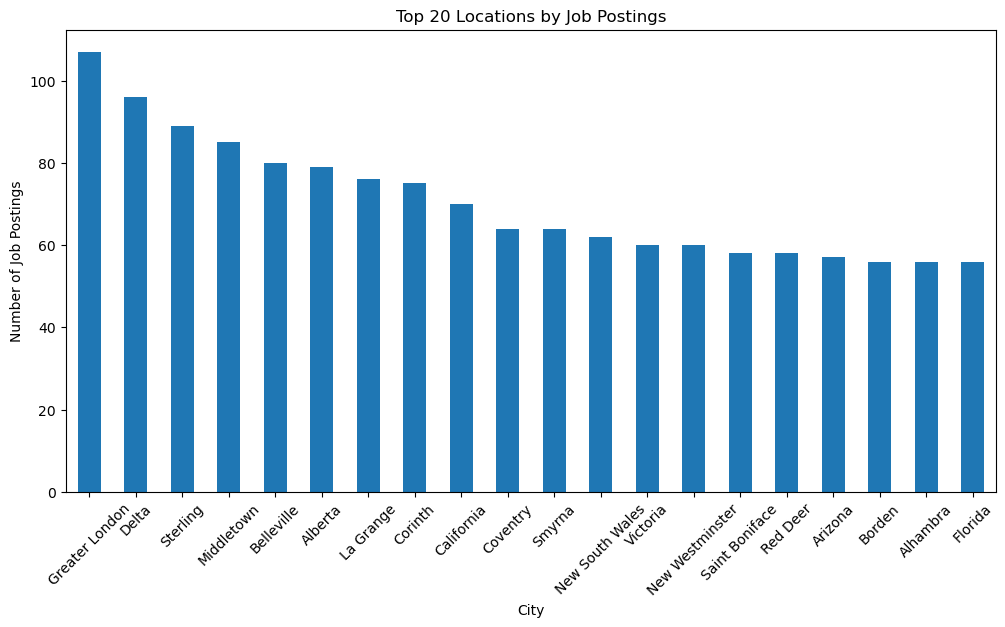

In [17]:
import matplotlib.pyplot as plt

# Count job postings per city
city_counts = df['search_city'].value_counts().head(20)  # Top 20 locations

plt.figure(figsize=(12,6))
city_counts.plot(kind='bar')
plt.title('Top 20 Locations by Job Postings')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

#Perhaps we can use this and focus on these locations?

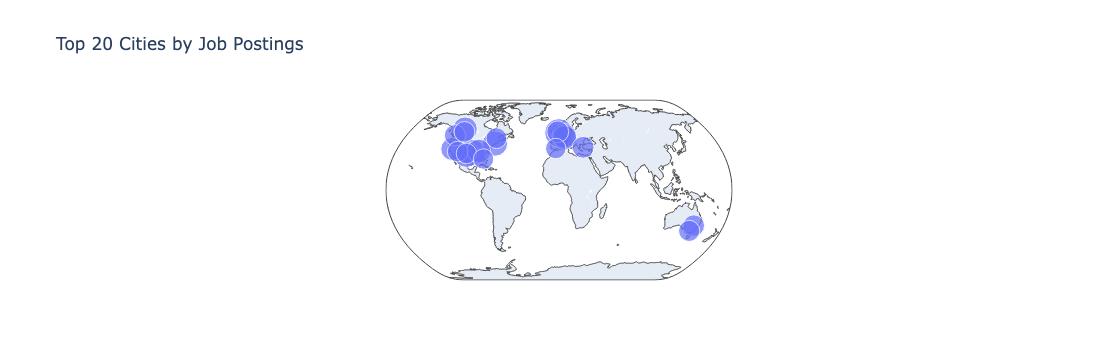

In [18]:
import plotly.express as px
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Example: Top 20 cities
city_counts = df['search_city'].value_counts().head(20).reset_index()
city_counts.columns = ['city', 'count']

# Geocode cities to get lat/lon (Also needed to Google how to do this but its basically a process to plot the bar graph onto a world map)
geolocator = Nominatim(user_agent="job_posting_locator")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def get_coords(city):
    try:
        loc = geocode(city)
        if loc:
            return loc.latitude, loc.longitude
        else:
            return None, None
    except:
        return None, None

city_counts['coords'] = city_counts['city'].apply(get_coords)
city_counts[['lat', 'lon']] = pd.DataFrame(city_counts['coords'].tolist(), index=city_counts.index)
city_counts = city_counts.dropna(subset=['lat', 'lon'])

# Plot on world map
fig = px.scatter_geo(city_counts,
                     lat='lat',
                     lon='lon',
                     hover_name='city',
                     size='count',
                     projection="natural earth",
                     title='Top 20 Cities by Job Postings')

# Yeah I looked up how to code this part because I thought it would be cool to have it on a map for easier visualization
fig.show()

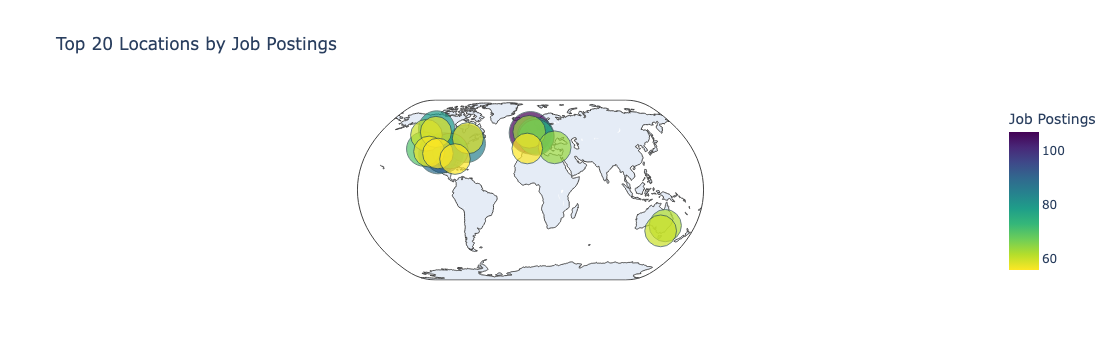

In [19]:

fig = px.scatter_geo(
    city_counts,
    lat='lat',
    lon='lon',
    hover_name='city',
    size='count',
    size_max=30,              # bubble size to change sizes
    color='count',            # color bubbles based on count
    color_continuous_scale='Viridis_r',  #creates the color scale shown on the right of the graphs
    projection="natural earth", #projection type, kinda can just mess around with this but this one is natural
    title='Top 20 Locations by Job Postings',
    labels={'count': 'Job Postings'}
)

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))


In [20]:
df_encoded = pd.get_dummies(df[['job_type', 'search_country', 'job level']], drop_first=True)
df_encoded = df_encoded.astype(int)
df_encoded.head()

job_type_Onsite  job_type_Remote  search_country_ Canada  \
0                1                0                       0   
1                1                0                       0   
2                1                0                       0   
3                1                0                       0   
4                0                0                       0   

   search_country_ United Kingdom  search_country_United States  \
0                               0                             1   
1                               0                             1   
2                               0                             1   
3                               0                             1   
4                               0                             1   

   job level_Mid senior  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

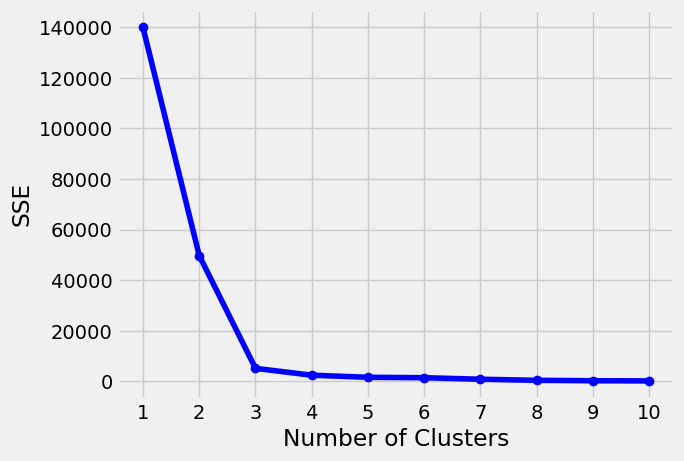

In [21]:

from sklearn.cluster import KMeans

coords = city_counts[['lat', 'lon']].to_numpy()

sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(K, sse, 'bo-')
plt.xticks(K)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


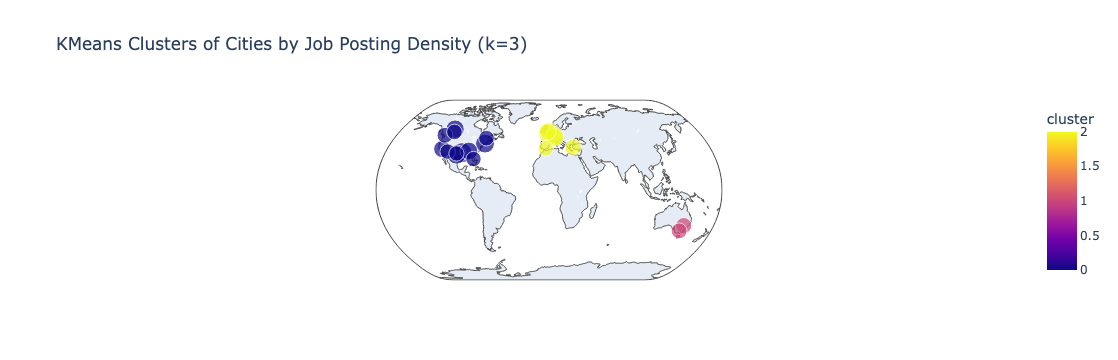

In [22]:
from sklearn.cluster import KMeans

coords = city_counts[['lat', 'lon']].to_numpy()

# Choose k (Elbow method above looks like best value is 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42).fit(coords)
city_counts['cluster'] = kmeans.labels_


fig = px.scatter_geo(
    city_counts,
    lat='lat',
    lon='lon',
    color='cluster',
    size='count',
    size_max=15,
    hover_name='city',
    projection="natural earth",
    title=f'KMeans Clusters of Cities by Job Posting Density (k={k})'
)
fig.show()
#This is me trying to cluster the top 20 cities by their region. I don't think the locations are too surprising.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Use existing coordinates (latitude and longitude)
coords = city_counts[['lat', 'lon']].to_numpy()

# Scale the coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(coords_scaled)

# Calculate silhouette score
score = silhouette_score(coords_scaled, kmeans.labels_)
print(f"Silhouette Score for k=3 (scaled): {score:.3f}")

Silhouette Score for k=3 (scaled): 0.678


In [24]:
cluster_totals = city_counts.groupby('cluster')['count'].sum().reset_index()
cluster_totals = cluster_totals.sort_values(by='count', ascending=False)
print(cluster_totals)

#Total job postings in those regions (America, Europe, Australia)
#In this case 0 = America, 2 = Europe, 1 = Australia

   cluster  count
0        0    839
2        2    447
1        1    122


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# We'll work with the 'job_skills' column and top cities
top_cities = city_counts.sort_values(by='count', ascending=False).head(10)['city']

# Filter your original dataset for only those cities
filtered_df = df[df['search_city'].isin(top_cities)]

# Replace NaNs in job_skills with empty strings
filtered_df['job_skills'] = filtered_df['job_skills'].fillna('')

# Group by city and aggregate all job_skills into one string per city
skills_by_city = filtered_df.groupby('search_city')['job_skills'].apply(lambda x: ' '.join(x)).reset_index()

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # unigrams and bigrams
X = vectorizer.fit_transform(skills_by_city['job_skills'])

# Convert to a DataFrame
skills_matrix = pd.DataFrame(X.toarray(), index=skills_by_city['search_city'], columns=vectorizer.get_feature_names_out())

# For each city, get top N features (skills)
top_skills_per_city = skills_matrix.apply(lambda row: row.sort_values(ascending=False).head(10), axis=1)

print(top_skills_per_city)


                airflow  analysis  analytics  apache   aws  azure  cloud  \
search_city                                                                
Alberta             NaN      34.0        NaN     NaN   NaN   39.0    NaN   
Belleville          NaN      35.0       20.0     NaN   NaN   26.0    NaN   
California          NaN       NaN        NaN    21.0  28.0    NaN    NaN   
Corinth             NaN       NaN        NaN     NaN   NaN   43.0   42.0   
Delta               NaN       NaN        NaN    32.0  51.0   61.0   47.0   
Greater London      NaN       NaN        NaN     NaN  33.0   74.0   37.0   
La Grange           NaN       NaN        NaN     NaN  27.0   46.0   27.0   
Middletown         22.0       NaN        NaN     NaN  34.0   32.0   28.0   
Smyrna              NaN      26.0        NaN     NaN  36.0    NaN    NaN   
Sterling            NaN      27.0       30.0     NaN  54.0   44.0   30.0   

                communication   data  data analysis  ...  kafka  machine  \
search_city

/var/folders/s_/b8ftbst93f787fwsbl3mjbf40000gn/T/ipykernel_38646/2621378267.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# Step 1: Unpivot the matrix to long format
long_skills_df = skills_matrix.stack().reset_index()
long_skills_df.columns = ['city', 'skill', 'count']

# Step 2: Get total skill mentions per city
total_counts = (
    long_skills_df.groupby('city')['count']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'count': 'total_count'})
)

# Step 3: Join total counts back to the main dataframe
long_skills_df = long_skills_df.merge(total_counts, on='city')

# Step 4: Sort cities by total count and select top N skills per city
top_n = 10
top_skills_per_city = (
    long_skills_df.sort_values(['total_count', 'city', 'count'], ascending=[False, True, False])
    .groupby('city')
    .head(top_n)
    .reset_index(drop=True)
)

# Optional: Drop total_count column now that it's sorted
top_skills_per_city = top_skills_per_city.drop(columns='total_count')

# Display
print(top_skills_per_city)

          city             skill  count
0     Sterling              data    337
1     Sterling               sql     61
2     Sterling               aws     54
3     Sterling            python     46
4     Sterling             azure     44
..         ...               ...    ...
95  California        management     27
96  California       engineering     24
97  California            apache     21
98  California  data engineering     19
99  California          learning     18

[100 rows x 3 columns]


In [27]:
#Ok im gonna map this to make it easier to visualize

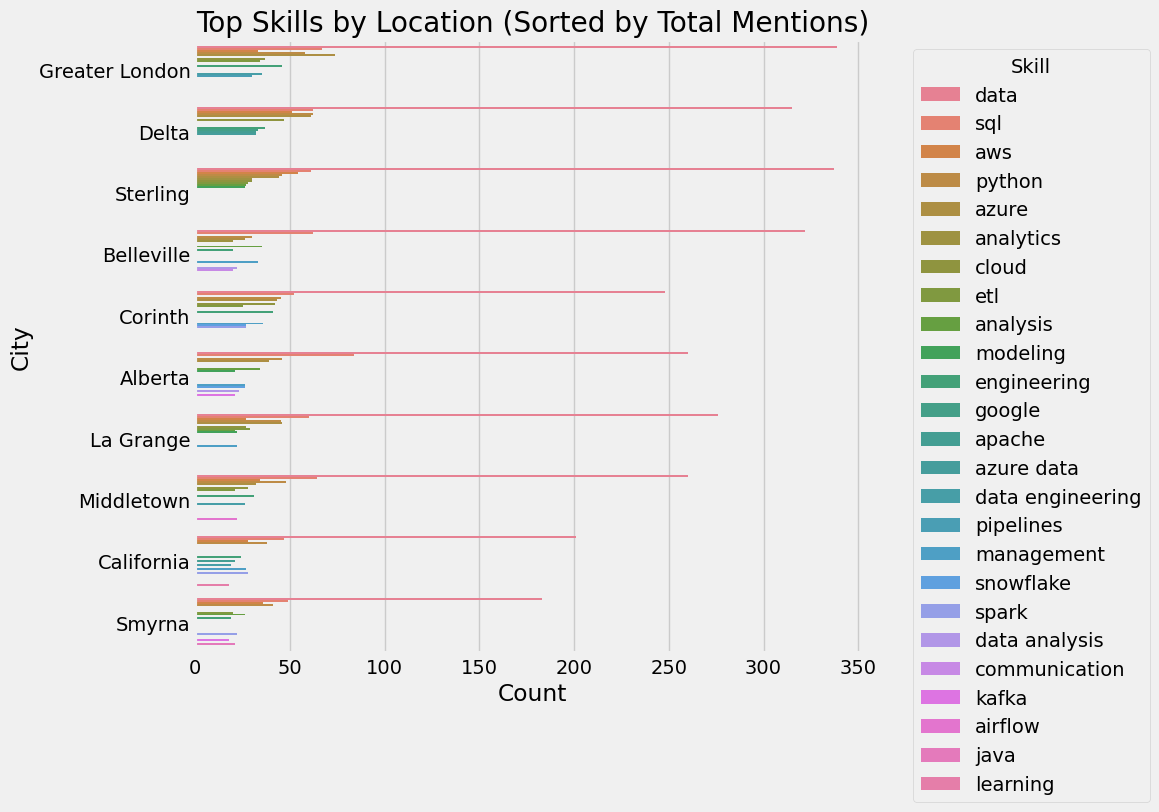

In [28]:
import seaborn as sns

city_order = (
    top_skills_per_city.groupby('city')['count']
    .sum()
    .sort_values(ascending=False)
    .index
)

# Plot with sorted city order
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_skills_per_city,
    x='count',
    y='city',
    hue='skill',
    order=city_order
)
plt.title('Top Skills by Location (Sorted by Total Mentions)')
plt.xlabel('Count')
plt.ylabel('City')
plt.legend(title='Skill', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#the plot is kinda weird but I think its fine? We get skills for each city I guess.

/var/folders/s_/b8ftbst93f787fwsbl3mjbf40000gn/T/ipykernel_38646/1472132285.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




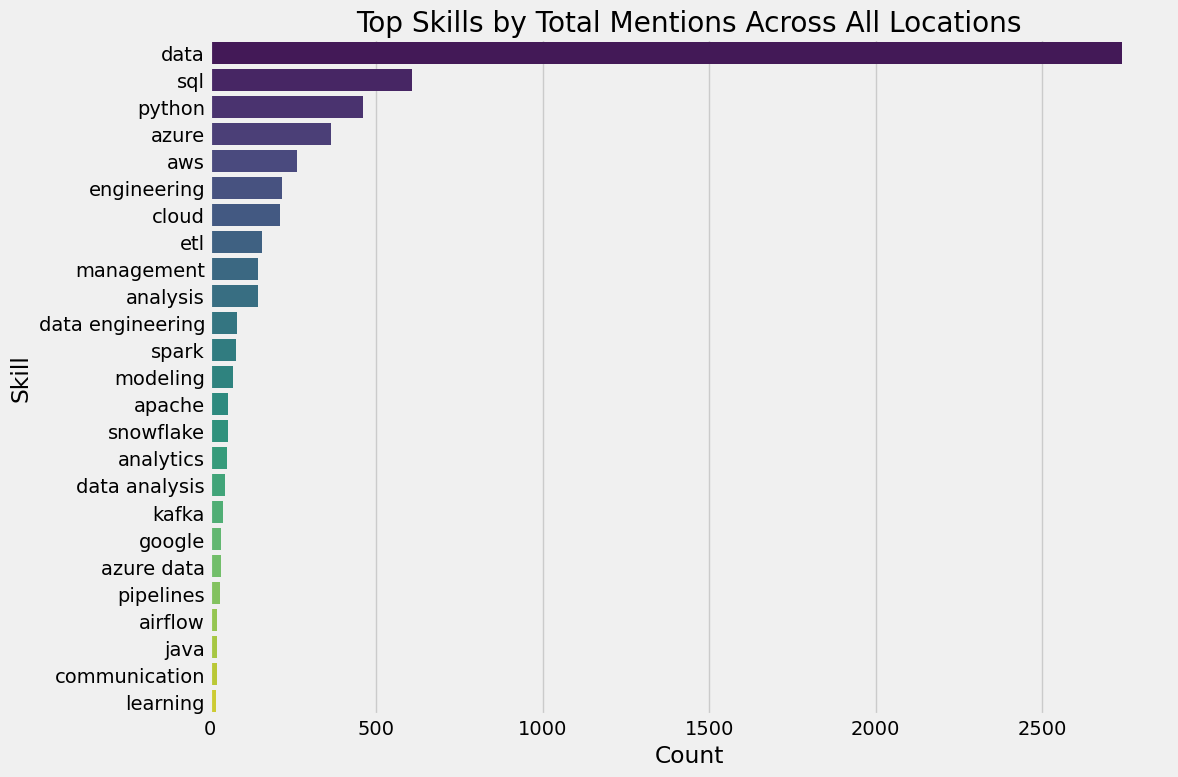

In [29]:
# Sum counts by skill across all cities
skill_counts = top_skills_per_city.groupby('skill')['count'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='viridis')
plt.title('Top Skills by Total Mentions Across All Locations')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Postings')

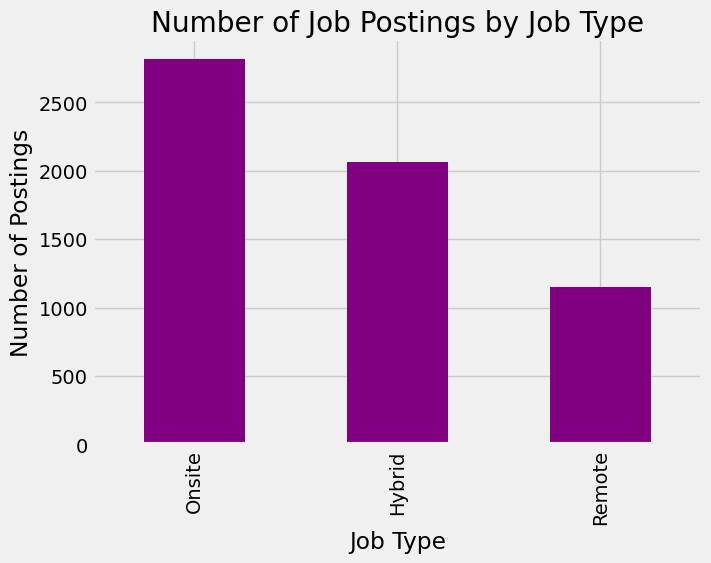

In [30]:
# Count the number of postings for each job type
job_type_counts = df['job_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(7,5))
job_type_counts.plot(kind='bar', color='purple')
plt.title('Number of Job Postings by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Number of Postings')


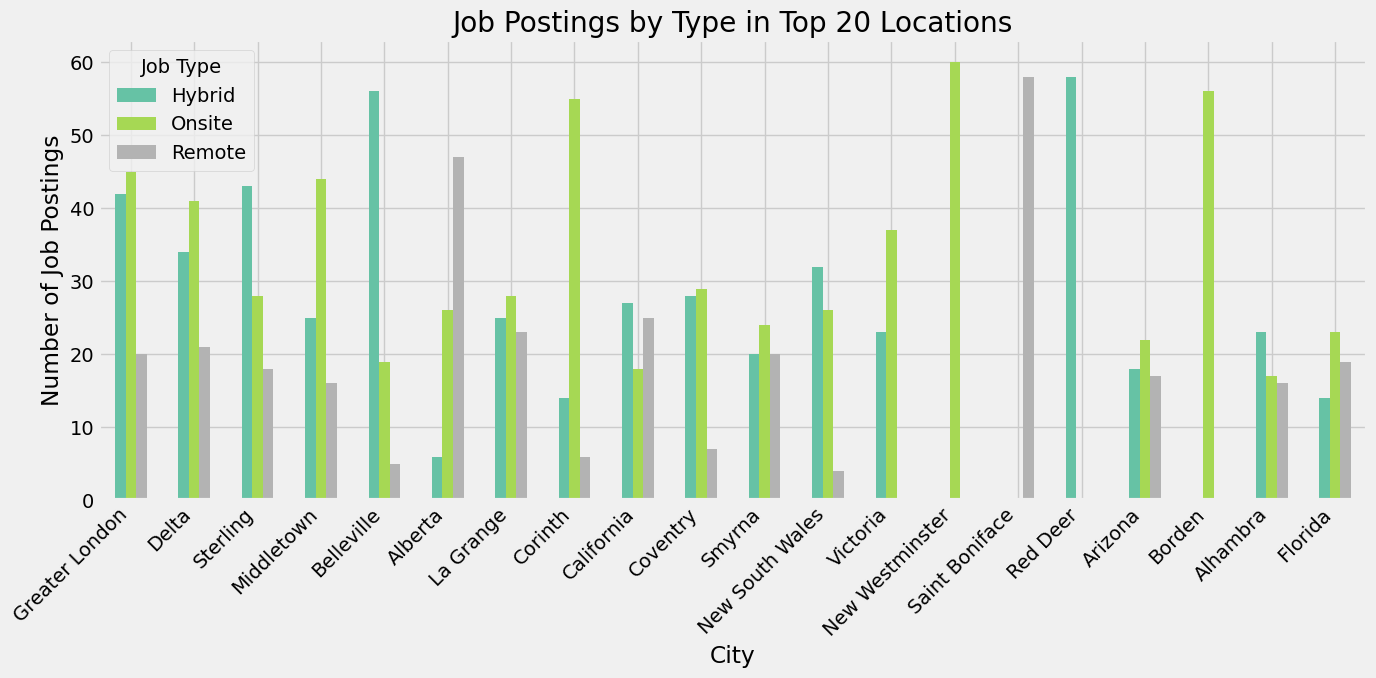

In [31]:
# Step 1: viewing top 20 only
top_cities = df['search_city'].value_counts().nlargest(20).index

# Step 2: Filter data
df_top_cities = df[df['search_city'].isin(top_cities)]

# Step 3: Group by city and job type, then count postings
job_type_by_city = df_top_cities.groupby(['search_city', 'job_type']).size().reset_index(name='count')

# Step 4: Pivot
pivot = job_type_by_city.pivot(index='search_city', columns='job_type', values='count').fillna(0)

# Step 5: Plot
pivot = pivot.loc[top_cities]
pivot.plot(kind='bar', stacked=False, figsize=(14,7), colormap='Set2')

plt.title('Job Postings by Type in Top 20 Locations')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Type')
plt.tight_layout()
plt.show()


In [32]:
for col in df.columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'job_title':
job_title
Senior Data Engineer                                 537
Data Engineer                                        449
Data Analyst                                         187
Senior Staff AI Data Engineer                        150
Senior Data Engineer, Public Company                 119
                                                    ... 
Senior Edge Data Center Engineer                       1
Data Engineer - 16479                                  1
Looking for Sr. Data Engineer- NYC, NY - Fulltime      1
Data Engineer / Consultant                             1
Lead Data Engineer (Python, SQL, Cloud Engineer)       1
Name: count, Length: 2566, dtype: int64

Value counts for 'company':
company
Recruiting from Scratch      341
Steneral Consulting          112
Nigel Frank International     80
Motion Recruitment            59
Railroad19                    58
                            ... 
Dignity Funerals Ltd           1
NuStaff Recruitment     

/var/folders/s_/b8ftbst93f787fwsbl3mjbf40000gn/T/ipykernel_38646/3857573849.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




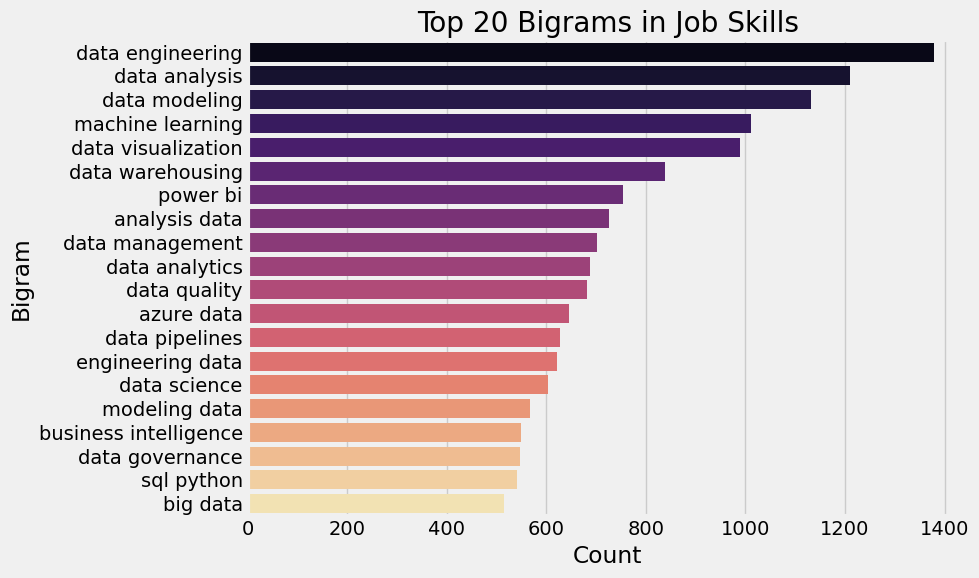

In [33]:
# Join all job_skills into one text blob
all_skills_text = ' '.join(df['job_skills'])

# vectorizer fo rbigram
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform([all_skills_text])

# making dataframe
bigrams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# get top bigrams
top_bigrams = bigrams_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_bigrams.values, y=top_bigrams.index, palette='magma')
plt.title('Top 20 Bigrams in Job Skills')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()


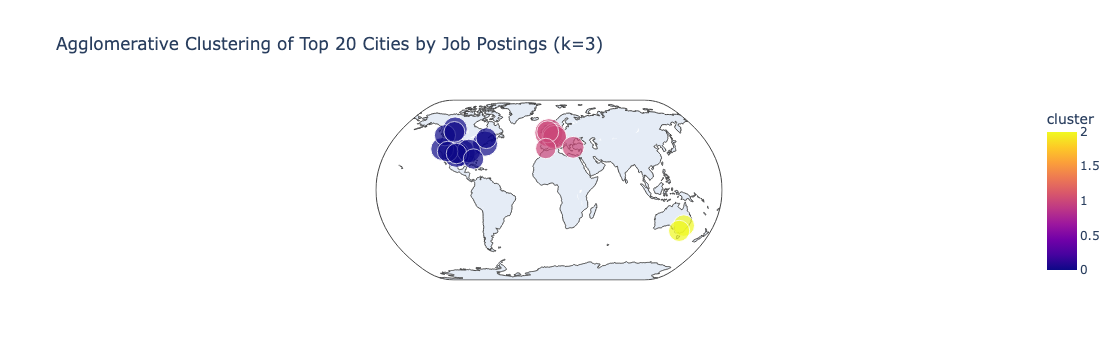

In [34]:
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px

#I copied the same code earlier but used city_counts which has already been modified instead of df
coords = city_counts[['lat', 'lon']].dropna().to_numpy()

agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(coords)

city_counts['cluster'] = labels

fig = px.scatter_geo(
    city_counts,
    lat='lat',
    lon='lon',
    color='cluster',
    hover_name='city',
    size='count',
    projection="natural earth",
    title='Agglomerative Clustering of Top 20 Cities by Job Postings (k=3)'
)
fig.show()


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing summaries with empty string
df['job_summary'] = df['job_summary'].fillna('')

# Optional: basic cleanup
df['job_summary_clean'] = df['job_summary'].str.lower().str.replace('\n', ' ')

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['job_summary_clean'])

kmeans = KMeans(n_clusters=4, random_state=42)
df['summary_cluster'] = kmeans.fit_predict(X_tfidf)

# Look at sample summaries from each cluster
for i in range(4):
    print(f"\nCluster {i} sample summaries:")
    print(df[df['summary_cluster'] == i]['job_summary'].head(2).values)



Cluster 0 sample summaries:
['Overview\nThe Data Engineer develops, implements and documents data systems that provide the technical solutions to meet specifications and business requirements defined by company objectives to promote effective, efficient, and compliant operations. Experience with Azure preferrable. Experience with relational SQL and NoSQL databases; experience with SQL Server, Azure, Oracle, and/or MongoDB preferred.\nHybird or Remote position with expectation of Eastern Time Zone Hours.\nResponsibilities\nWork as part of a project team to define and document data and data pipelines for a variety of solutions.\nTechnical responsibility for data and data pipelines to ensure compliance with data standards, architectural standards, and achievement of documented requirements.\nDevelop and maintain current state documentation and deliverables for data solutions.\nMaintain existing and new data solutions to ensure that they continue to meet user needs.\nProvide assistance to

In [36]:
# Calculate silhouette score using TF-IDF vectors and assigned labels
score = silhouette_score(X_tfidf, df['summary_cluster'])

print(f"Silhouette Score for TF-IDF + KMeans (k=4): {score:.3f}")

Silhouette Score for TF-IDF + KMeans (k=4): 0.038


In [37]:
import numpy as np

# Get feature names (words)
terms = vectorizer.get_feature_names_out()

# For each cluster, get top keywords
def print_top_keywords_per_cluster(kmeans_model, terms, n_terms=10):
    for i, cluster_center in enumerate(kmeans_model.cluster_centers_):
        top_indices = cluster_center.argsort()[-n_terms:][::-1]  # top n keywords
        top_terms = [terms[ind] for ind in top_indices]
        print(f"\nCluster {i} top keywords:")
        print(", ".join(top_terms))

print_top_keywords_per_cluster(kmeans, terms)


Cluster 0 top keywords:
data, experience, business, azure, pipelines, work, engineering, skills, team, solutions

Cluster 1 top keywords:
database, experience, data, oracle, sql, databases, systems, management, work, development

Cluster 2 top keywords:
data, experience, work, team, business, including, status, engineering, company, time

Cluster 3 top keywords:
data, experience, skills, work, job, client, years, required, engineer, aws


In [38]:
cluster_labels = {
    0: 'Cloud Data Engineering',
    1: 'Database Administration & Management',
    2: 'Data Engineering & ETL',
    3: 'Business-Focused Data Analytics'
}

df['cluster_label'] = df['summary_cluster'].map(cluster_labels)

In [39]:
df.groupby('cluster_label')['job_type'].value_counts(normalize=True)
df.groupby('cluster_label')['search_country'].value_counts(normalize=True)

cluster_label                         search_country 
Business-Focused Data Analytics       United States      0.635850
                                       United Kingdom    0.160903
                                       Canada            0.154552
                                       Australia         0.048694
Cloud Data Engineering                United States      0.596586
                                       Canada            0.203953
                                       United Kingdom    0.143756
                                       Australia         0.055705
Data Engineering & ETL                United States      0.753781
                                       Canada            0.103025
                                       United Kingdom    0.102079
                                       Australia         0.041115
Database Administration & Management  United States      0.778195
                                       Canada            0.142857
                      

In [40]:
import pandas as pd

# Updated proportion values based on your latest input
data = {
    'cluster_label': [
        'Business-Focused Data Analytics', 'Business-Focused Data Analytics', 'Business-Focused Data Analytics', 'Business-Focused Data Analytics',
        'Cloud Data Engineering', 'Cloud Data Engineering', 'Cloud Data Engineering', 'Cloud Data Engineering',
        'Data Engineering & ETL', 'Data Engineering & ETL', 'Data Engineering & ETL', 'Data Engineering & ETL',
        'Database Administration & Management', 'Database Administration & Management', 'Database Administration & Management', 'Database Administration & Management'
    ],
    'search_country': [
        'United States', 'United Kingdom', 'Canada', 'Australia',
        'United States', 'Canada', 'United Kingdom', 'Australia',
        'United States', 'Canada', 'United Kingdom', 'Australia',
        'United States', 'Canada', 'United Kingdom', 'Australia'
    ],
    'proportion': [
        0.635850, 0.160903, 0.154552, 0.048694,    # Business-Focused Data Analytics
        0.596586, 0.203953, 0.143756, 0.055705,    # Cloud Data Engineering
        0.753781, 0.103025, 0.102079, 0.041115,    # Data Engineering & ETL
        0.778195, 0.142857, 0.048872, 0.030075     # Database Administration & Management
    ]
}

# Create the updated proportion DataFrame
df_prop = pd.DataFrame(data)

# Calculate total jobs per cluster using your original DataFrame
cluster_totals = df['cluster_label'].value_counts().to_dict()

# Map total jobs to the proportion DataFrame
df_prop['total_jobs'] = df_prop['cluster_label'].map(cluster_totals)

# Calculate actual job counts
df_prop['actual_jobs'] = (df_prop['proportion'] * df_prop['total_jobs']).round().astype(int)

# View final result
df_prop

cluster_label  search_country  proportion  \
0        Business-Focused Data Analytics   United States    0.635850   
1        Business-Focused Data Analytics  United Kingdom    0.160903   
2        Business-Focused Data Analytics          Canada    0.154552   
3        Business-Focused Data Analytics       Australia    0.048694   
4                 Cloud Data Engineering   United States    0.596586   
5                 Cloud Data Engineering          Canada    0.203953   
6                 Cloud Data Engineering  United Kingdom    0.143756   
7                 Cloud Data Engineering       Australia    0.055705   
8                 Data Engineering & ETL   United States    0.753781   
9                 Data Engineering & ETL          Canada    0.103025   
10                Data Engineering & ETL  United Kingdom    0.102079   
11                Data Engineering & ETL       Australia    0.041115   
12  Database Administration & Management   United States    0.778195   
13  Database Administration & Management          Canada    0.142857   
14  Database Administration & Management  United Kingdom    0.048872   
15  Database Administration & Management       Australia    0.030075   

    total_jobs  actual_jobs  
0         1417          901  
1         1417          228  
2         1417          219  
3         1417           69  
4         2226         1328  
5         2226          454  
6         2226          320  
7         2226          124  
8         2116         1595  
9         2116          218  
10        2116          216  
11        2116           87  
12         266          207  
13         266           38  
14         266           13  
15         266            8

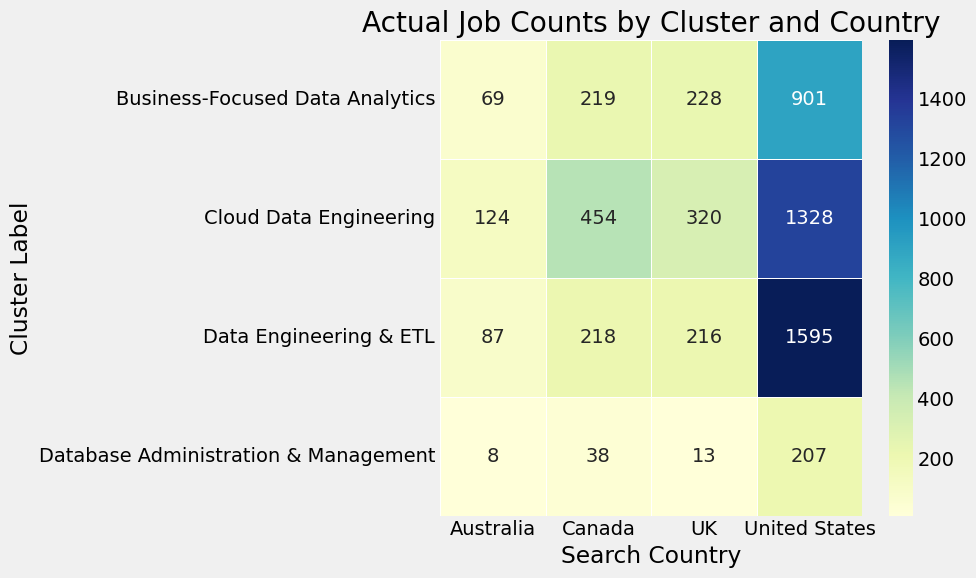

In [41]:
# Replace 'United Kingdom' with 'UK'
df_prop['search_country'] = df_prop['search_country'].replace({'United Kingdom': 'UK'})

# Pivot the DataFrame
heatmap_data = df_prop.pivot(index='cluster_label', columns='search_country', values='actual_jobs')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

# Titles and labels
plt.title('Actual Job Counts by Cluster and Country')
plt.xlabel('Search Country')
plt.ylabel('Cluster Label')

plt.tight_layout()
plt.show()

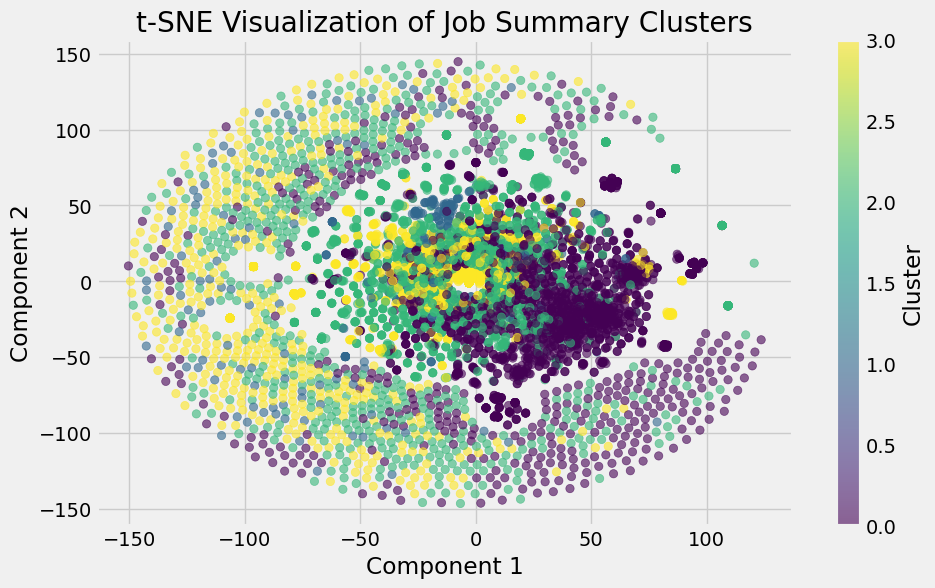

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df['summary_cluster'], cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Job Summary Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

/var/folders/s_/b8ftbst93f787fwsbl3mjbf40000gn/T/ipykernel_38646/65073201.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



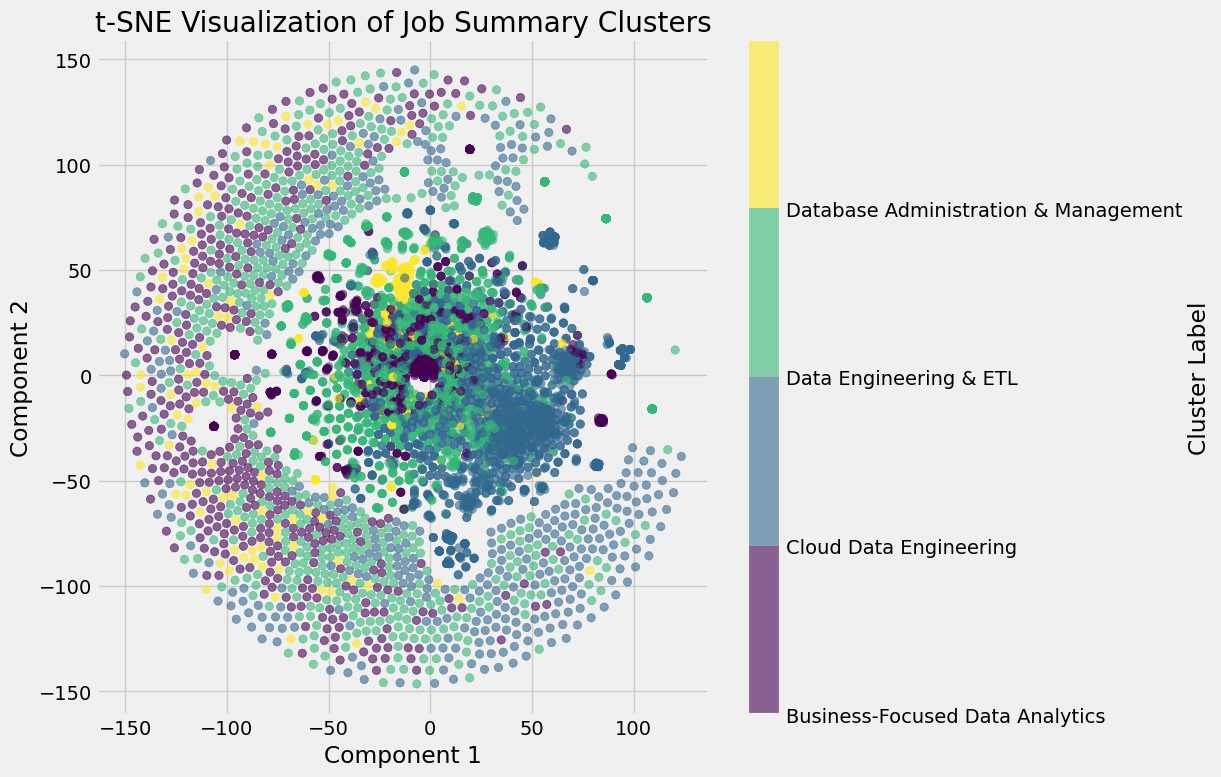

In [43]:
import matplotlib.colors as mcolors

# t-SNE transformation
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_tfidf.toarray())

# Create DataFrame
df_vis = pd.DataFrame(X_embedded, columns=['x', 'y'])
df_vis['cluster'] = df['summary_cluster']
df_vis['label'] = df['cluster_label']

# Get unique cluster labels and assign them integer codes
label_to_code = {label: i for i, label in enumerate(sorted(df_vis['label'].unique()))}
code_to_label = {v: k for k, v in label_to_code.items()}
df_vis['cluster_code'] = df_vis['label'].map(label_to_code)

# Create color map and norm
cmap = plt.cm.get_cmap('viridis', len(label_to_code))
norm = mcolors.BoundaryNorm(boundaries=range(len(label_to_code)+1), ncolors=len(label_to_code))

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_vis['x'], df_vis['y'], c=df_vis['cluster_code'], cmap=cmap, norm=norm, alpha=0.6)

# Add colorbar with cluster label ticks
cbar = plt.colorbar(scatter, ticks=range(len(code_to_label)))
cbar.ax.set_yticklabels([code_to_label[i] for i in range(len(code_to_label))])
cbar.set_label('Cluster Label')

plt.title('t-SNE Visualization of Job Summary Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.show()

I need to improve the silhouette score. As there is a lot of overlap within the clusters and underfitting. Create more clusters, introduce dimensionality reduction, Try different k values, Increase max_features in TfidfVectorizer, and use dbscan to improve score.

In [46]:
score = silhouette_score(X_tfidf, df['summary_cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.0376


Reducing TF-IDF dimensions with TruncatedSVD...

Evaluating cluster sizes...
Silhouette Score for k=2: 0.0495
Silhouette Score for k=3: 0.0653
Silhouette Score for k=4: 0.0823
Silhouette Score for k=5: 0.1086
Silhouette Score for k=6: 0.1059
Silhouette Score for k=7: 0.1060
Silhouette Score for k=8: 0.1233
Silhouette Score for k=9: 0.1259
Silhouette Score for k=10: 0.1298
Silhouette Score for k=11: 0.1354
Silhouette Score for k=12: 0.1355
Silhouette Score for k=13: 0.1392
Silhouette Score for k=14: 0.1486
Silhouette Score for k=15: 0.1476

 Best number of clusters: k=14 with Silhouette Score: 0.1486

Running t-SNE for visualization...


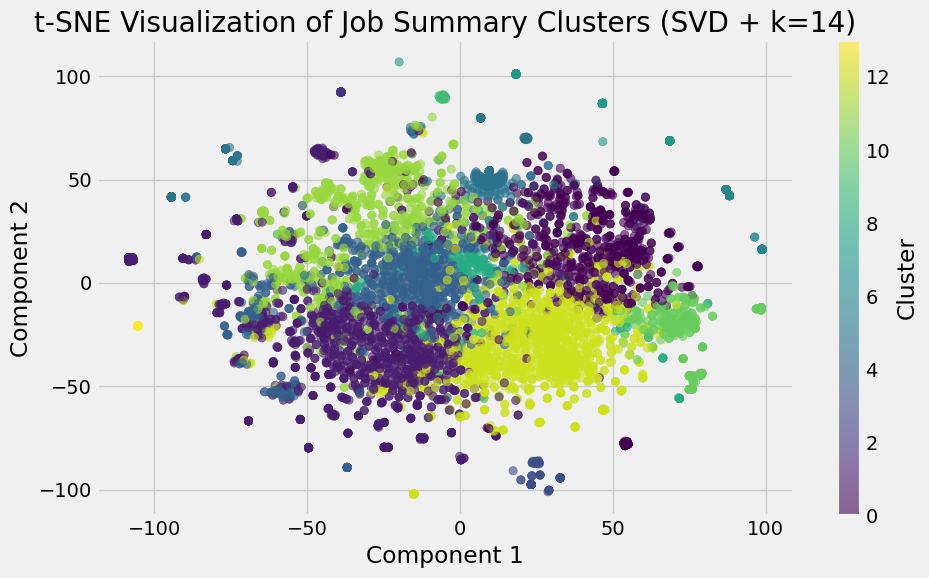

In [47]:
from sklearn.decomposition import TruncatedSVD

# Step 1: Reduce dimensionality with Truncated SVD
print("Reducing TF-IDF dimensions with TruncatedSVD...")
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

# Step 2: Try different numbers of clusters and evaluate with silhouette score
k_range = range(2, 16)
best_k = None
best_score = -1
best_labels = None

print("\nEvaluating cluster sizes...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_reduced)

    score = silhouette_score(X_reduced, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

    if score > best_score:
        best_k = k
        best_score = score
        best_labels = labels

# Step 3: Store the best cluster labels in the DataFrame
df['summary_cluster'] = best_labels
print(f"\n Best number of clusters: k={best_k} with Silhouette Score: {best_score:.4f}")

# Step 4: Visualize the clusters with t-SNE
print("\nRunning t-SNE for visualization...")
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_reduced)

plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df['summary_cluster'], cmap='viridis', alpha=0.6)
plt.title(f't-SNE Visualization of Job Summary Clusters (SVD + k={best_k})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


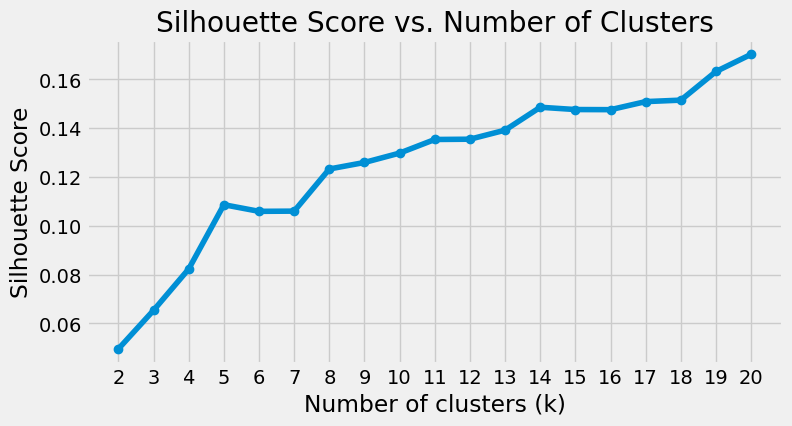

In [48]:
silhouette_scores = []
k_values = range(2, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()


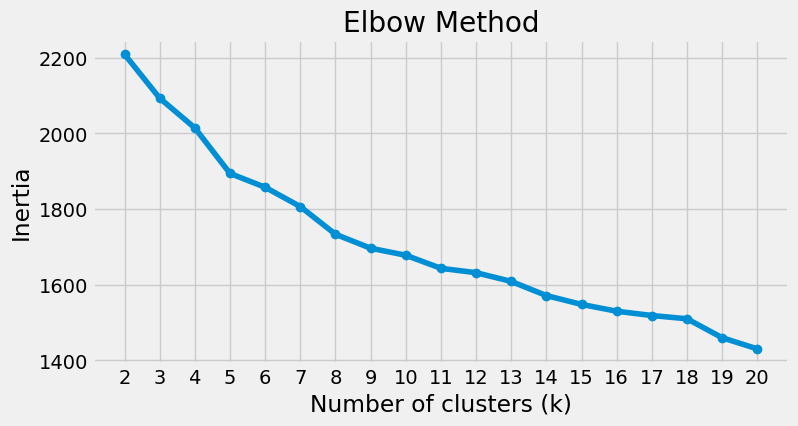

In [49]:
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()
